# Include All Required Libraries

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd

# Defining the Functions for Kmeans and Gausian Mixture Model with PCA

## 1. Function for computing the appropriate cluster using silhoutte scores 

In [2]:
# defining the function for kmeans to find the appropriate number of clusters using silhoutte scores
def kmeans_clustering_find_clusters(scaled_features,max_labels=11):
  # A list holds the silhouette coefficients for each k named s
  cluster = 0
  sil = 0
  s = []
  for k in range(2, max_labels):
    kmeans = KMeans(n_clusters=k, init = "k-means++", n_init= 10, max_iter= 200, random_state= 50)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    if sil < score :
      cluster = k
      sil = score
    s.append(score)
    print("For Cluster \n",k)
    print("Centroids are: \n",kmeans.cluster_centers_)
    print("Number of iterations are: \n",kmeans.n_iter_)
    print("Labels are: \n",kmeans.labels_[:5])
    print("Centroid Shape is: \n",kmeans.cluster_centers_.shape)
    print("Silhoutte Score for cluster ",k," is ",score,'\n')
  # plotting the silhoutte socres
  #plt.style.use("fivethirtyeight")
  plt.plot(range(2, 11), s, marker='o', linestyle='dashed',linewidth=2, markersize=8)
  #plt.xticks(range(2, 11))
  plt.xlabel("Number of Clusters")
  plt.ylabel("Silhouette Coefficient")
  plt.show()
  print("Finally Based on silhoutte score the cluster ",cluster," is chosen having maximum score of ",sil)
  return cluster,sil

## 2. Function for Kmeans using clusters found.

In [3]:
# defining the function to perform kmeans on appropriate cluster found earlier
# plot_x and plot_y are the features we want to plot.
def final_kmeans(scaled_features,plot_x,plot_y,cluster=2):
  print("Finally Running the kmeans with the clusters found out using silhoutte scores\n")
  str = ["Clusters with k=1","Clusters with k=2","Clusters with k=3","Clusters with k=4","Clusters with k=5","Clusters with k=6","Clusters with k=7","Clusters with k=8"]
  kmeans = KMeans(n_clusters=cluster, init = "k-means++", n_init= 10, max_iter= 200, random_state= 50)
  kmeans.fit(scaled_features)
  Output = kmeans.predict(scaled_features)
  print("Shape of Centroids is: ",kmeans.cluster_centers_.shape)
  x_min, x_max = scaled_features[:, plot_x].min() - 1, scaled_features[:, plot_x].max() + 1
  y_min, y_max = scaled_features[:, plot_y].min() - 1, scaled_features[:, plot_y].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=Output,label=str[cluster-1])
  plt.scatter(kmeans.cluster_centers_[:,plot_x],kmeans.cluster_centers_[:,plot_y],s=30,c='Red',label='Centroids')
  plt.legend()
  plt.show()
  return kmeans


## 3. Function for Kmeans using pca

In [4]:
# defining the function for kmeans using reduced data
def kmeans_pca(scaled_features,cluster=2):
  reduced_data = PCA(n_components=2).fit_transform(scaled_features)
  kmeans = KMeans(init="k-means++", n_clusters=cluster, n_init=4)
  kmeans.fit(reduced_data)
  target = kmeans.predict(reduced_data)
  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.2  
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.clf()
  plt.contourf(xx, yy, Z, cmap = 'viridis',c=target)
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=target)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(centroids[:, 0],centroids[:, 1],marker="+",s=169,linewidths=3,color="w",zorder=10,)
  plt.title("K-means clustering on the dataset (PCA-reduced data)\n""Centroids are marked with white +")
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show()

## 4. Function for GMM Using Diagonal, Identity and Full Covariance matrices

In [5]:
# defining the function for GMM using kmeans
# plot_x and plot_y are the features we want to plot.
def gausianmixturemodel(scaled_features,plot_x,plot_y,cluster=2):
  print("\n\nDiagonal matrix used")
  kmeans = KMeans(n_clusters=cluster, init = "k-means++", n_init= 10, max_iter= 300, random_state= 42)
  kmeans.fit(scaled_features)
  Output = kmeans.predict(scaled_features)
  str = ["Clusters with k=1","Clusters with k=2","Clusters with k=3","Clusters with k=4","Clusters with k=5","Clusters with k=6","Clusters with k=7","Clusters with k=8"]
  gm_diag = GaussianMixture(n_components=cluster, random_state=0,covariance_type='diag',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_full = GaussianMixture(n_components=cluster, random_state=0,covariance_type='full',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_identity = GaussianMixture(n_components=cluster, random_state=0,covariance_type='tied',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_diag.fit(scaled_features)
  target = gm_diag.predict(scaled_features)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=target,label=str[cluster-1])
  plt.scatter(gm_diag.means_[:,plot_x],gm_diag.means_[:,plot_y],c="Red",label="Means")
  plt.legend()
  plt.show()
  print("Centers of Clusters are: \n",kmeans.cluster_centers_)
  print("Means of Clusters are: \n",gm_diag.means_)
  # for full diagonal
  print("\n\nFull matrix used")
  gm_full.fit(scaled_features)
  target = gm_full.predict(scaled_features)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=target,label=str[cluster-1])
  plt.scatter(gm_full.means_[:,plot_x],gm_full.means_[:,plot_y],c="Red",label="Means")
  plt.legend()
  plt.show()
  print("Centers of Clusters are: \n",kmeans.cluster_centers_)
  print("Means of Clusters are: \n",gm_full.means_)
  print("\n\nIdentity matrix used")
  gm_identity.fit(scaled_features)
  target = gm_identity.predict(scaled_features)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.scatter(scaled_features[:,plot_x],scaled_features[:,plot_y],c=target,label=str[cluster-1])
  plt.scatter(gm_identity.means_[:,plot_x],gm_identity.means_[:,plot_y],c="Red",label="Means")
  plt.legend()
  plt.show()
  print("Centers of Clusters are: \n",kmeans.cluster_centers_)
  print("Means of Clusters are: \n",gm_identity.means_)


## 5. Function for GMM using PCA only for Diagonal Covariance Matrices

In [6]:
# defining the function for GMM using pca
def gmm_pca(scaled_features,cluster=2):
  reduced_data = PCA(n_components=2).fit_transform(scaled_features)
  kmeans = KMeans(init="k-means++", n_clusters=cluster, n_init=4)
  kmeans.fit(reduced_data)
  target = kmeans.predict(reduced_data)
  # diagonal Matrix used for GMM
  gm_diag = GaussianMixture(n_components=cluster, random_state=0,covariance_type='diag',init_params='kmeans',means_init=kmeans.cluster_centers_)
  gm_diag.fit(reduced_data)
  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = 0.2  
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  # Plot the decision boundary. For that, we will assign a color to each
  x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
  y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  # Obtain labels for each point in mesh. Use last trained model.
  Z = gm_diag.predict(np.c_[xx.ravel(), yy.ravel()])
  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.subplots(figsize=(5, 5), dpi=100)
  plt.clf()
  plt.contourf(xx, yy, Z, cmap = 'viridis',c=target)
  plt.scatter(reduced_data[:, 0], reduced_data[:, 1],c=target)
  # Plot the centroids as a white X
  centroids = gm_diag.means_init
  plt.scatter(centroids[:, 0],centroids[:, 1],marker="+",s=169,linewidths=3,color="w",zorder=10,)
  plt.title("GMM on the dataset (PCA-reduced data)\n""Centroids are marked with white +")
  plt.xlabel('$x_1$')
  plt.ylabel('$x_2$')
  plt.show() 

# First Dataset

## -> Describing the data

In [7]:
df1 = pd.read_csv("Wine.csv")
print("Description fo dataset: \n",df1.describe,'\n')
print("Shape of dataset: \n",df1.shape,'\n')
print("Checking for null values: \n",df1.isnull().sum(),'\n')
print("Columns in dataset: \n",df1.columns,'\n')

Description fo dataset: 
 <bound method NDFrame.describe of      Alcohol  Malic_Acid   Ash  ...  OD280  Proline  Customer_Segment
0      14.23        1.71  2.43  ...   3.92     1065                 1
1      13.20        1.78  2.14  ...   3.40     1050                 1
2      13.16        2.36  2.67  ...   3.17     1185                 1
3      14.37        1.95  2.50  ...   3.45     1480                 1
4      13.24        2.59  2.87  ...   2.93      735                 1
..       ...         ...   ...  ...    ...      ...               ...
173    13.71        5.65  2.45  ...   1.74      740                 3
174    13.40        3.91  2.48  ...   1.56      750                 3
175    13.27        4.28  2.26  ...   1.56      835                 3
176    13.17        2.59  2.37  ...   1.62      840                 3
177    14.13        4.10  2.74  ...   1.60      560                 3

[178 rows x 14 columns]> 

Shape of dataset: 
 (178, 14) 

Checking for null values: 
 Alcohol     

## -> Selecting the target and Removing it from examples 

In [8]:
c1 ='Customer_Segment'
print(df1[c1].unique())
y_true1 = df1[c1]
X1 = df1.iloc[:,:13]
print(df1.info())
print("\nColumns after removing the target column:\n",X1.columns)
print("Target values\n",y_true1)

[1 2 3]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Columns after

## -> Scaling the Data

In [9]:
scaler1 = StandardScaler()
scaled_features1 = scaler1.fit_transform(X1)
print(scaled_features1[:5])

[[ 1.51861254 -0.5622498   0.23205254 -1.16959318  1.91390522  0.80899739
   1.03481896 -0.65956311  1.22488398  0.25171685  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 -2.49084714  0.01814502  0.56864766
   0.73362894 -0.82071924 -0.54472099 -0.29332133  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 -0.2687382   0.08835836  0.80899739
   1.21553297 -0.49840699  2.13596773  0.26901965  0.31830389  0.78858745
   1.39514818]
 [ 1.69154964 -0.34681064  0.4879264  -0.80925118  0.93091845  2.49144552
   1.46652465 -0.98187536  1.03215473  1.18606801 -0.42754369  1.18407144
   2.33457383]
 [ 0.29570023  0.22769377  1.84040254  0.45194578  1.28198515  0.80899739
   0.66335127  0.22679555  0.40140444 -0.31927553  0.36217728  0.44960118
  -0.03787401]]


## -> Running the Functions Defined Above For Kmeans

For Cluster 
 2
Centroids are: 
 [[ 0.04197899 -0.38224053 -0.10922044 -0.29717226  0.08897972  0.5428402
   0.60204711 -0.48200615  0.41194796 -0.31261472  0.50738654  0.61509448
   0.26067933]
 [-0.07297886  0.66451047  0.18987553  0.51662255 -0.15468782 -0.94370681
  -1.04663574  0.83794915 -0.71615568  0.54346866 -0.88207198 -1.06931809
  -0.45318098]]
Number of iterations are: 
 5
Labels are: 
 [0 0 0 0 0]
Centroid Shape is: 
 (2, 13)
Silhoutte Score for cluster  2  is  0.26831340971052126 

For Cluster 
 3
Centroids are: 
 [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.

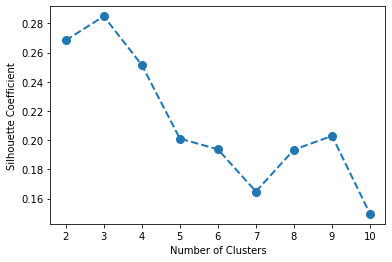

Finally Based on silhoutte score the cluster  3  is chosen having maximum score of  0.2848589191898987
3 0.2848589191898987
Finally Running the kmeans with the clusters found out using silhoutte scores

Shape of Centroids is:  (3, 13)


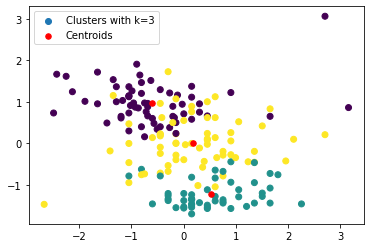

In [10]:
cluster1,sil1 = kmeans_clustering_find_clusters(scaled_features1,11)
print(cluster1,sil1)
km = final_kmeans(scaled_features1,3,6,cluster1)

## -> Kmeans With PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'c'


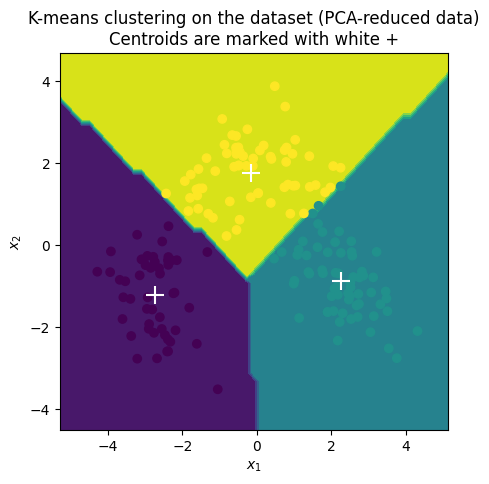

In [11]:
kmeans_pca(scaled_features1,cluster1)

## -> Gausian Mixture Model



Diagonal matrix used


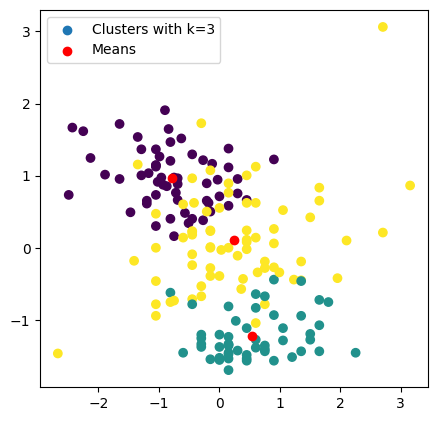

Centers of Clusters are: 
 [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
Means of Clusters are: 
 [[ 0.95241954 -0.33411933  0.27004471 -0.79099196  0.44163737  0.8906181
   0.97368656 -0.60884898  0.54643753  0.2311523   0.47024486  0.77038994
   1.22082015]
 [ 0.15504821  0.84424631  0.19988035  0.54457954 -0.05064774 -0.99346179
  -1.21856027  0.7180595  -0.76162976  0.93524319 -1.14960115 -1.29791405
  -0.38100933]
 [-0.87865449 -0.34415506 -0.36232405  0.24088994 -0.31846784  0.00485536
   0.10145578 -0.03156289  0.11339569 -0.86490148  0.456343

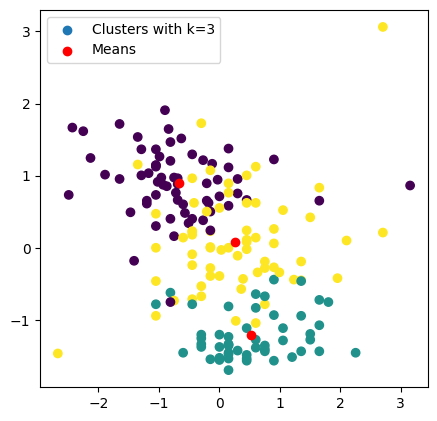

Centers of Clusters are: 
 [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
Means of Clusters are: 
 [[ 0.81388958 -0.33262555  0.24380292 -0.6750915   0.63510284  0.82094008
   0.89622873 -0.5979901   0.61932153  0.13104449  0.5009758   0.74595868
   1.11233685]
 [ 0.16518103  0.87142811  0.18788644  0.52524876 -0.07458612 -0.9792853
  -1.21560547  0.7259935  -0.7794772   0.9426359  -1.16489918 -1.2928127
  -0.40657496]
 [-0.94261117 -0.36648604 -0.39317067  0.25165095 -0.57263915 -0.03336322
   0.08087369  0.01416567  0.00741468 -0.88515821  0.4338196

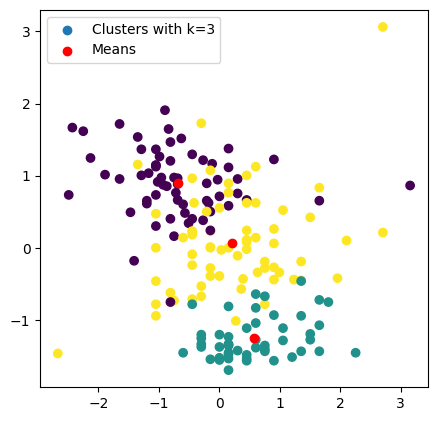

Centers of Clusters are: 
 [[ 0.83523208 -0.30380968  0.36470604 -0.61019129  0.5775868   0.88523736
   0.97781956 -0.56208965  0.58028658  0.17106348  0.47398365  0.77924711
   1.12518529]
 [ 0.16490746  0.87154706  0.18689833  0.52436746 -0.07547277 -0.97933029
  -1.21524764  0.72606354 -0.77970639  0.94153874 -1.16478865 -1.29241163
  -0.40708796]
 [-0.92607185 -0.39404154 -0.49451676  0.17060184 -0.49171185 -0.07598265
   0.02081257 -0.03353357  0.0582655  -0.90191402  0.46180361  0.27076419
  -0.75384618]]
Means of Clusters are: 
 [[ 0.82602795 -0.34379253  0.25311158 -0.67918774  0.64668351  0.82987409
   0.90082802 -0.59803584  0.62307512  0.1385985   0.50573192  0.74727106
   1.12995736]
 [ 0.15477323  0.87241974  0.27949143  0.57711214  0.01902433 -0.990502
  -1.24797474  0.63997952 -0.75159187  0.96687237 -1.18066333 -1.29408398
  -0.37287494]
 [-0.89156267 -0.32054384 -0.44451346  0.2130757  -0.62258179 -0.04969168
   0.07361699  0.09029941 -0.03146475 -0.84420869  0.3957152

In [12]:
gausianmixturemodel(scaled_features1,3,6,cluster1)

## -> Gausian Mixture Model with PCA

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'c'


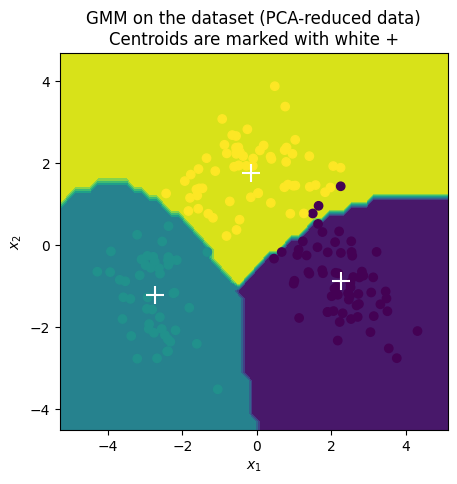

In [13]:
gmm_pca(scaled_features1,cluster1)

# Second Dataset

## -> Descrbing Data

In [14]:
df2 = pd.read_csv("Iris.csv")
df2 = df2.fillna(0)
X2 = df2.iloc[:,1:5]
print("Description fo dataset: \n",df2.describe,'\n')
print("Shape of dataset: \n",df2.shape,'\n')
print("Checking for null values: \n",df2.isnull().sum(),'\n')
print("Columns in dataset: \n",df2.columns,'\n')
scaler2 = StandardScaler()
scaled_features2 = scaler2.fit_transform(X2)
print("Scaled data\n",scaled_features2[:5])

Description fo dataset: 
 <bound method NDFrame.describe of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]> 

Shape of dataset: 
 (150, 6) 

Checking for null values: 
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 

Columns in datase

## -> Running Kmeans and GMM with PCA

For Cluster 
 2
Centroids are: 
 [[ 0.50728948 -0.4211534   0.65243918  0.62756431]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]]
Number of iterations are: 
 2
Labels are: 
 [1 1 1 1 1]
Centroid Shape is: 
 (2, 4)
Silhoutte Score for cluster  2  is  0.580184463257396 

For Cluster 
 3
Centroids are: 
 [[ 1.13140499  0.08716178  0.98548265  0.99875633]
 [-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [-0.06881714 -0.89036741  0.34501443  0.28492552]]
Number of iterations are: 
 5
Labels are: 
 [1 1 1 1 1]
Centroid Shape is: 
 (3, 4)
Silhoutte Score for cluster  3  is  0.45840087099074767 

For Cluster 
 4
Centroids are: 
 [[ 1.13140499  0.08716178  0.98548265  0.99875633]
 [-1.28213558  0.22643209 -1.30968035 -1.29836862]
 [-0.06881714 -0.89036741  0.34501443  0.28492552]
 [-0.70049078  1.56529014 -1.29924123 -1.20436862]]
Number of iterations are: 
 5
Labels are: 
 [3 1 1 1 3]
Centroid Shape is: 
 (4, 4)
Silhoutte Score for cluster  4  is  0.3865117624564891 

For Cluster 
 5


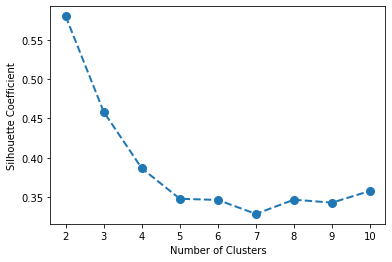

Finally Based on silhoutte score the cluster  2  is chosen having maximum score of  0.580184463257396
Finally Running the kmeans with the clusters found out using silhoutte scores

Shape of Centroids is:  (3, 4)


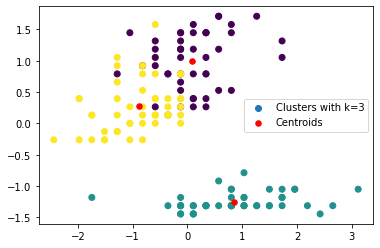

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'c'


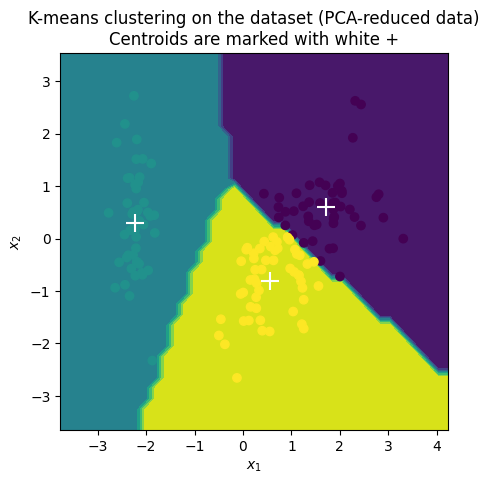



Diagonal matrix used


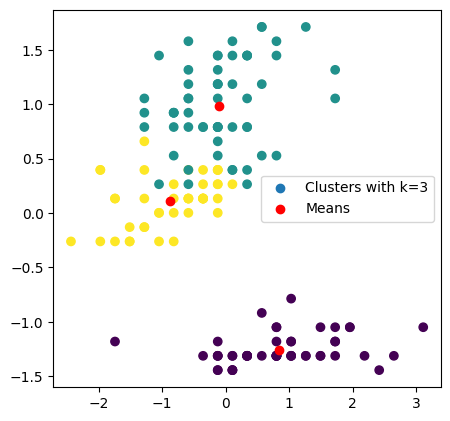

Centers of Clusters are: 
 [[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]
Means of Clusters are: 
 [[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 0.92138228 -0.09850612  0.94638419  0.98647982]
 [-0.08856128 -0.88542041  0.22947273  0.11110982]]


Full matrix used


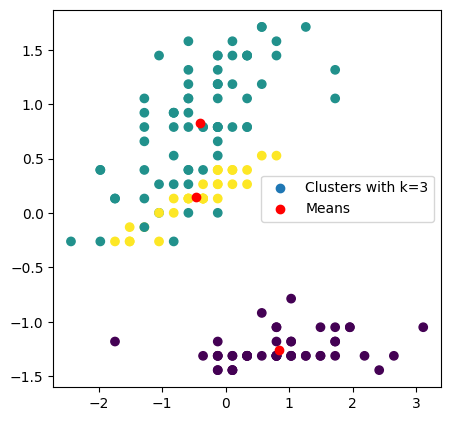

Centers of Clusters are: 
 [[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]
Means of Clusters are: 
 [[-1.01457894  0.84230693 -1.30487835 -1.25512862]
 [ 0.64717237 -0.39926765  0.81255686  0.8243383 ]
 [ 0.16402805 -0.47485937  0.2595232   0.14469678]]


Identity matrix used


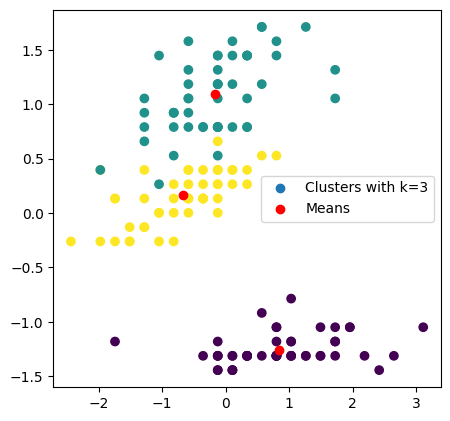

Centers of Clusters are: 
 [[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 1.13597027  0.09659843  0.996271    1.01717187]
 [-0.05021989 -0.88029181  0.34753171  0.28206327]]
Means of Clusters are: 
 [[-1.01457897  0.84230679 -1.30487835 -1.25512862]
 [ 0.89104704 -0.16335832  1.01462236  1.09260614]
 [ 0.12290717 -0.67936816  0.28966636  0.1617654 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'c'


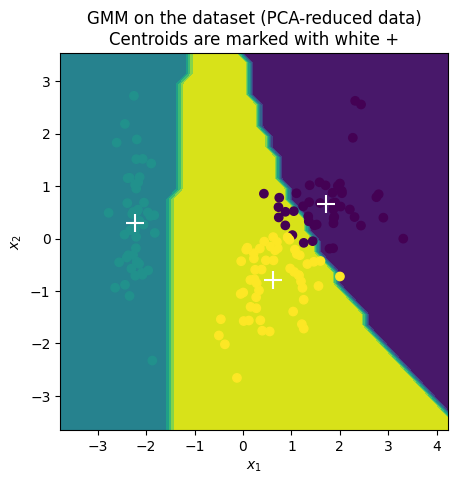

In [20]:
cluster2,sil2 = kmeans_clustering_find_clusters(scaled_features2)
if cluster2==2:
  cluster2=3
final_kmeans(scaled_features2,1,3,cluster2)
kmeans_pca(scaled_features2,cluster2)
gausianmixturemodel(scaled_features2,1,3,cluster2)
gmm_pca(scaled_features2,cluster2)

# Randomly Created Dataset

Scaled data
 [[ 0.15741592 -0.83446738]
 [-0.40448171  0.47683301]
 [ 0.03677881  0.75393005]
 [-0.84338412  0.16522924]
 [-0.39513995  0.18898416]]
For Cluster 
 2
Centroids are: 
 [[ 1.85732971 -1.45142515]
 [-0.46433243  0.36285629]]
Number of iterations are: 
 10
Labels are: 
 [1 1 1 1 1]
Centroid Shape is: 
 (2, 2)
Silhoutte Score for cluster  2  is  0.6797609206661273 

For Cluster 
 3
Centroids are: 
 [[-0.35841335 -0.02960018]
 [-0.75070622  1.4239423 ]
 [ 1.85732971 -1.45142515]]
Number of iterations are: 
 10
Labels are: 
 [0 0 0 0 0]
Centroid Shape is: 
 (3, 2)
Silhoutte Score for cluster  3  is  0.6043177170311974 

For Cluster 
 4
Centroids are: 
 [[ 0.00379244 -0.54919286]
 [-0.78403289  1.47193051]
 [ 1.85732971 -1.45142515]
 [-0.54402279  0.2725613 ]]
Number of iterations are: 
 5
Labels are: 
 [0 3 3 3 3]
Centroid Shape is: 
 (4, 2)
Silhoutte Score for cluster  4  is  0.6314451183899393 

For Cluster 
 5
Centroids are: 
 [[ 0.02148769 -0.54772641]
 [-0.78834233  1.4761

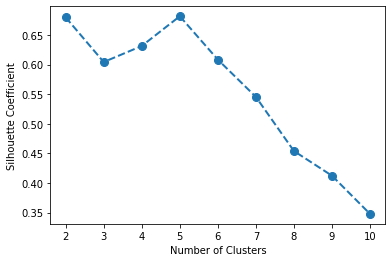

Finally Based on silhoutte score the cluster  5  is chosen having maximum score of  0.6816780280862504
Finally Running the kmeans with the clusters found out using silhoutte scores

Shape of Centroids is:  (5, 2)


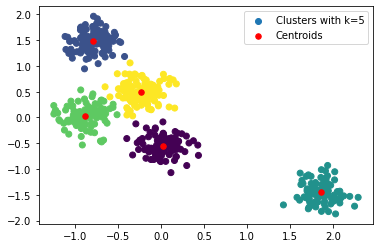

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: The following kwargs were not used by contour: 'c'


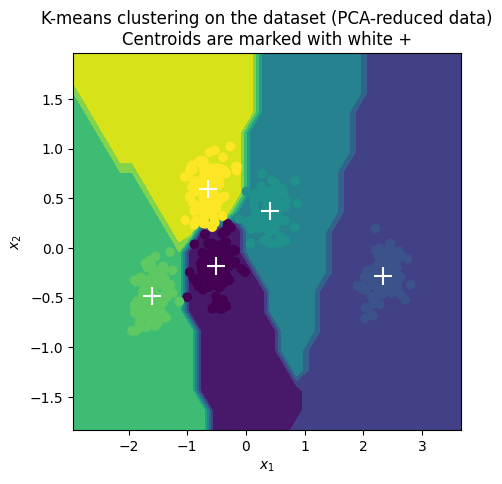



Diagonal matrix used


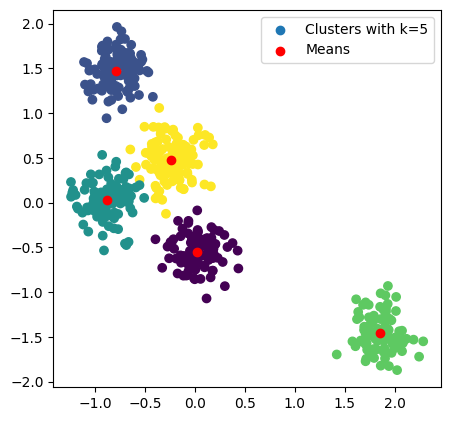

Centers of Clusters are: 
 [[ 0.02148769 -0.54772641]
 [-0.78834233  1.476109  ]
 [-0.87620445  0.03668644]
 [ 1.85732971 -1.45142515]
 [-0.23269721  0.48723393]]
Means of Clusters are: 
 [[ 0.02393738 -0.55209149]
 [-0.78840078  1.47608205]
 [-0.87926983  0.03427505]
 [ 1.85732971 -1.45142515]
 [-0.2389337   0.47717517]]


Full matrix used


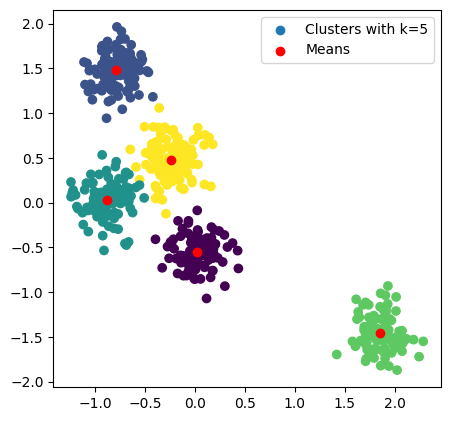

Centers of Clusters are: 
 [[ 0.02148769 -0.54772641]
 [-0.78834233  1.476109  ]
 [-0.87620445  0.03668644]
 [ 1.85732971 -1.45142515]
 [-0.23269721  0.48723393]]
Means of Clusters are: 
 [[ 0.02364797 -0.55164929]
 [-0.78863903  1.4763113 ]
 [-0.87965843  0.03443459]
 [ 1.85732971 -1.45142515]
 [-0.23935014  0.4775822 ]]


Identity matrix used


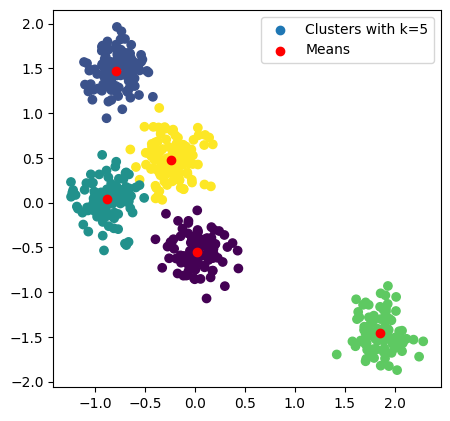

Centers of Clusters are: 
 [[ 0.02148769 -0.54772641]
 [-0.78834233  1.476109  ]
 [-0.87620445  0.03668644]
 [ 1.85732971 -1.45142515]
 [-0.23269721  0.48723393]]
Means of Clusters are: 
 [[ 0.02276051 -0.54913009]
 [-0.78743969  1.47510688]
 [-0.87738948  0.03587744]
 [ 1.85732971 -1.45142515]
 [-0.23607067  0.48105229]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'c'


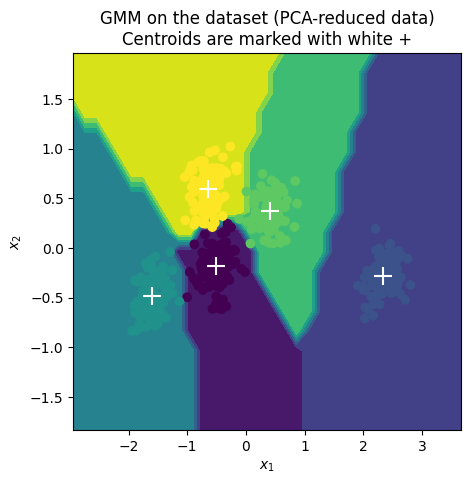

In [16]:
X3, y_true3 = make_blobs(n_samples=500, centers=5,cluster_std=0.67, random_state=0)
scaler3 = StandardScaler()
scaled_features3 = scaler3.fit_transform(X3)
print("Scaled data\n",scaled_features3[:5])
cluster3,sil3 = kmeans_clustering_find_clusters(scaled_features3)
final_kmeans(scaled_features3,0,1,cluster3)
kmeans_pca(scaled_features3,cluster3)
gausianmixturemodel(scaled_features3,0,1,cluster3)
gmm_pca(scaled_features3,cluster3)